In [1]:
import numpy as np
import time
from collections import namedtuple
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import qiskit as q
import qiskit.tools.jupyter
from qiskit.pulse import pulse_lib as _  # only want to call pulse_lib as q.pulse.pulse_lib
from qiskit.test.mock import FakeAlmaden
from qiskit.ignis.verification.tomography.data import marginal_counts

In [7]:
import sys
sys.path.append('../')
import pulse_compiler_helper_fns

In [8]:
backend = FakeAlmaden()
system = q.pulse.PulseChannelSpec.from_backend(backend)
back_config = backend.configuration().to_dict()
cmd_def = q.pulse.CmdDef.from_defaults(backend.defaults().cmd_def, backend.defaults().pulse_library)
measure = cmd_def.get('measure', qubits=backend.configuration().meas_map[0])
backend_sim = qiskit.Aer.get_backend('pulse_simulator')

/Users/pranavgokhale/Developer/qiskit/qiskit-terra/qiskit/pulse/channels/pulse_channel_spec.py:87: DeprecationWarning: The PulseChannelSpec is deprecated. Use backend.configuration() instead. The supported methods require some migrations; check out the release notes for the complete details.
  DeprecationWarning)


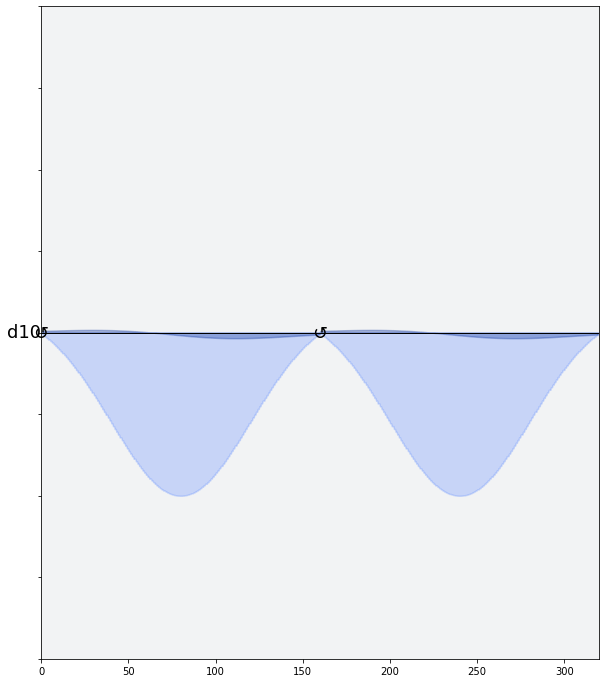

In [71]:
schedule = cmd_def.get('u3', qubits=[10], P0=np.pi, P1=0, P2=np.pi)
schedule.draw(channels=[system.qubits[10].drive], framechange=True, table=False, filename='standard_x.svg')

In [70]:
circuit = q.QuantumCircuit(20)
circuit.x(10)
decomposed_circuit = circuit.decompose()
pulse_compiler_helper_fns.update_basis_gates_and_cmd_def(decomposed_circuit, backend, system, cmd_def)
transpiled_circuit = q.transpile(circuit, backend, optimization_level=1)
schedule = q.schedule(transpiled_circuit, backend=backend, cmd_def=cmd_def)
schedule |= q.pulse.SamplePulse([0] * 160)(system.qubits[10].drive) << schedule.duration
schedule.draw(channels=[system.qubits[10].drive], framechange=True, table=False, filename='direct_x.svg')
schedule.draw?